**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Importing the datasets**

In [2]:
df1 =  pd.read_csv('application_data.csv.zip')
df2 =  pd.read_csv('previous_application.csv.zip')

**Merging the datasets**

In [3]:
common_columns = df1.columns.intersection (df2.columns)
common_columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

***8 common columns are present***

In [4]:
df3 = df1.merge(df2,on='SK_ID_CURR')

In [5]:
df3.shape

(1413701, 158)

In [6]:
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [7]:
df3['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'Cooking staff', 'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [8]:
df3.groupby(['TARGET','DAYS_LAST_PHONE_CHANGE']).count()

SK_ID_CURR  NAME_CONTRACT_TYPE_x  CODE_GENDER  \
TARGET DAYS_LAST_PHONE_CHANGE                                                  
0      -4292.0                          2                     2            2   
       -4173.0                          7                     7            7   
       -4153.0                          2                     2            2   
       -4066.0                          3                     3            3   
       -4051.0                          7                     7            7   
...                                   ...                   ...          ...   
1      -4.0                           201                   201          201   
       -3.0                           154                   154          154   
       -2.0                           234                   234          234   
       -1.0                           543                   543          543   
        0.0                         12659                 12659        12659   

                               FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET DAYS_LAST_PHONE_CHANGE                                                
0      -4292.0                            2                2             2   
       -4173.0                            7                7             7   
       -4153.0                            2                2             2   
       -4066.0                            3                3             3   
       -4051.0                            7                7             7   
...                                     ...              ...           ...   
1      -4.0                             201              201           201   
       -3.0                             154              154           154   
       -2.0                             234              234           234   
       -1.0                             543              543           543   
        0.0                           12659            12659         12659   

                               AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
TARGET DAYS_LAST_PHONE_CHANGE                                                  
0      -4292.0                                2             2              2   
       -4173.0                                7             7              7   
       -4153.0                                2             2              2   
       -4066.0                                3             3              3   
       -4051.0                                7             7              7   
...                                         ...           ...            ...   
1      -4.0                                 201           201            201   
       -3.0                                 154           154            154   
       -2.0                                 234           234            234   
       -1.0                                 543           543            543   
        0.0                               12659         12659          12659   

                               AMT_GOODS_PRICE_x  ...  NAME_SELLER_INDUSTRY  \
TARGET DAYS_LAST_PHONE_CHANGE                     ...                         
0      -4292.0                                 2  ...                     2   
       -4173.0                                 7  ...                     7   
       -4153.0                                 2  ...                     2   
       -4066.0                                 3  ...                     3   
       -4051.0                                 7  ...                     7   
...                                          ...  ...                   ...   
1      -4.0                                  201  ...                   201   
       -3.0                                  154  ...                   154   
       -2.0                                  234  ...                   234   
       -1.0                                  543  ...            

In [9]:
df1[df1["TARGET"]==1]["DAYS_LAST_PHONE_CHANGE"].value_counts()

 0.0       3641
-1.0        250
-2.0        143
-3.0         88
-4.0         85
           ... 
-2067.0       1
-2443.0       1
-3232.0       1
-2400.0       1
-3675.0       1
Name: DAYS_LAST_PHONE_CHANGE, Length: 2965, dtype: int64

*Most of the defaulters changed their phone recently*

In [10]:
df2['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [11]:
df1[df1["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts()

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64

*Most of the loan defaulters are married people*

In [12]:
df1['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

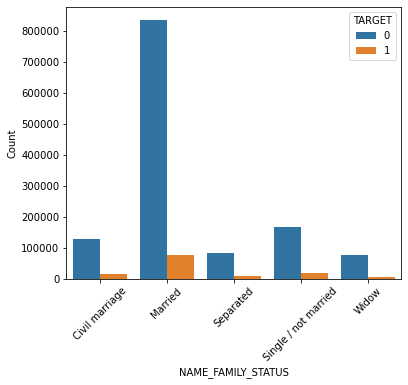

In [13]:
plt.figure(figsize=(6,5))
defaulters = df3.groupby(["NAME_FAMILY_STATUS",'TARGET']).count()['SK_ID_CURR'].reset_index()
sns.barplot(x='NAME_FAMILY_STATUS',y='SK_ID_CURR',hue='TARGET',data=defaulters)
plt.ylabel("Count",size=10)
plt.xticks(rotation=45)
plt.show()

*Default rate for marriedpeople is 7.5% ,single is 9.8% ,Civil marriage is 9.94% , separated is 8.1% , widow is 5.8% 
 the rate is highest for Civil marriage*                 

In [14]:
df1[df1["TARGET"]==1]["FLAG_OWN_REALTY"].value_counts()

Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64

In [15]:
df1['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [16]:
df3.groupby(["CNT_PAYMENT",'TARGET']).count()[['SK_ID_CURR']]

SK_ID_CURR
CNT_PAYMENT TARGET            
0.0         0           109589
            1            12396
3.0         0              890
            1               54
4.0         0            21901
...                        ...
66.0        0               10
72.0        0              114
            1                9
84.0        0               21
            1               24

[79 rows x 1 columns]

In [17]:
df3[df3["TARGET"]==1]["DAYS_TERMINATION"].value_counts()

 365243.0    16322
-204.0          68
-271.0          65
-163.0          64
-236.0          64
             ...  
-2726.0          1
-1680.0          1
-1239.0          1
-2749.0          1
-2212.0          1
Name: DAYS_TERMINATION, Length: 2714, dtype: int64

In [18]:
df3['DAYS_TERMINATION'].value_counts()

 365243.0    194000
-156.0          653
-233.0          652
-170.0          641
-163.0          638
              ...  
-2804.0           1
-2757.0           1
-2803.0           1
-2802.0           1
-2852.0           1
Name: DAYS_TERMINATION, Length: 2809, dtype: int64

In [19]:
df2['NAME_PORTFOLIO'].unique()

array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

In [20]:
df3[df3["TARGET"]==1]["NAME_PORTFOLIO"].value_counts()

POS      45240
Cash     34766
XNA      29937
Cards    12396
Cars        21
Name: NAME_PORTFOLIO, dtype: int64

In [21]:
df3['CNT_PAYMENT']

0          24.0
1          12.0
2           6.0
3          12.0
4           4.0
           ... 
1413696    24.0
1413697     0.0
1413698    60.0
1413699    36.0
1413700     6.0
Name: CNT_PAYMENT, Length: 1413701, dtype: float64

In [22]:
df3[df3["TARGET"]==1]["CNT_PAYMENT"].value_counts()

12.0    20857
0.0     12396
6.0     11512
24.0     9853
10.0     8682
36.0     6370
18.0     5522
48.0     5135
60.0     4616
8.0      2063
4.0      1459
30.0     1359
14.0      721
42.0      606
16.0      387
5.0       215
54.0      198
20.0      115
7.0        82
15.0       68
9.0        63
3.0        54
11.0       38
84.0       24
72.0        9
13.0        7
17.0        6
28.0        2
23.0        2
35.0        1
41.0        1
Name: CNT_PAYMENT, dtype: int64

In [23]:
df3[df3["TARGET"]==1]["NAME_GOODS_CATEGORY"].value_counts()

XNA                         74824
Mobile                      16753
Consumer Electronics         7405
Computers                    7288
Audio/Video                  6551
Furniture                    2658
Photo / Cinema Equipment     1656
Construction Materials       1488
Clothing and Accessories     1117
Auto Accessories              565
Jewelry                       469
Vehicles                      287
Homewares                     286
Sport and Leisure             184
Medical Supplies              182
Office Appliances             164
Gardening                     156
Other                         134
Medicine                       80
Tourism                        56
Direct Sales                   27
Fitness                         7
Additional Service              7
Insurance                       6
Education                       5
Weapon                          5
Name: NAME_GOODS_CATEGORY, dtype: int64

In [24]:
df3.groupby(["NAME_GOODS_CATEGORY",'TARGET']).count()[['SK_ID_CURR']]

SK_ID_CURR
NAME_GOODS_CATEGORY      TARGET            
Additional Service       0              102
                         1                7
Animals                  0                1
Audio/Video              0            78951
                         1             6551
Auto Accessories         0             5663
                         1              565
Clothing and Accessories 0            18473
                         1             1117
Computers                0            82635
                         1             7288
Construction Materials   0            19868
                         1             1488
Consumer Electronics     0            97380
                         1             7405
Direct Sales             0              303
                         1               27
Education                0               84
                         1                5
Fitness                  0              159
                         1                7
Furniture                0            42781
                         1             2658
Gardening                0             2166
                         1              156
Homewares                0             4023
                         1              286
Insurance                0               52
                         1                6
Jewelry                  0             4719
                         1              469
Medical Supplies         0             3058
                         1              182
Medicine                 0             1222
                         1               80
Mobile                   0           176990
                         1            16753
Office Appliances        0             1821
                         1              164
Other                    0             2203
                         1              134
Photo / Cinema Equipment 0            20051
                         1             1656
Sport and Leisure        0             2356
                         1              184
Tourism                  0             1268
                         1               56
Vehicles                 0             2567
                         1              287
Weapon                   0               60
                         1                5
XNA                      0           722385
                         1            74824

In [25]:
df3['NAME_SELLER_INDUSTRY'].unique()

array(['Auto technology', 'XNA', 'Furniture', 'Consumer electronics',
       'Connectivity', 'Construction', 'Clothing', 'Industry', 'Tourism',
       'Jewelry', 'MLM partners'], dtype=object)

In [26]:
df3.groupby(["NAME_CASH_LOAN_PURPOSE",'TARGET']).count()[['SK_ID_CURR']]

SK_ID_CURR
NAME_CASH_LOAN_PURPOSE           TARGET            
Building a house or an annex     0             2020
                                 1              324
Business development             0              313
                                 1               46
Buying a garage                  0              109
                                 1                7
Buying a holiday home / land     0              408
                                 1               55
Buying a home                    0              617
                                 1               84
Buying a new car                 0              806
                                 1               80
Buying a used car                0             2151
                                 1              318
Car repairs                      0              564
                                 1              127
Education                        0             1194
                                 1              140
Everyday expenses                0             1836
                                 1              216
Furniture                        0              575
                                 1               85
Gasification / water supply      0              206
                                 1               45
Hobby                            0               36
                                 1                9
Journey                          0              931
                                 1              111
Medicine                         0             1620
                                 1              251
Money for a third person         0               19
                                 1                4
Other                            0            11759
                                 1             1673
Payments on other loans          0             1321
                                 1              252
Purchase of electronic equipment 0              817
                                 1              117
Refusal to name the goal         0               10
                                 1                3
Repairs                          0            17501
                                 1             2616
Urgent needs                     0             6154
                                 1             1082
Wedding / gift / holiday         0              707
                                 1               94
XAP                              0           721774
                                 1            65163
XNA                              0           517893
                                 1            49458

In [27]:
print("Name portfolio")
df3["NAME_PORTFOLIO"].value_counts()

Name portfolio


POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: NAME_PORTFOLIO, dtype: int64

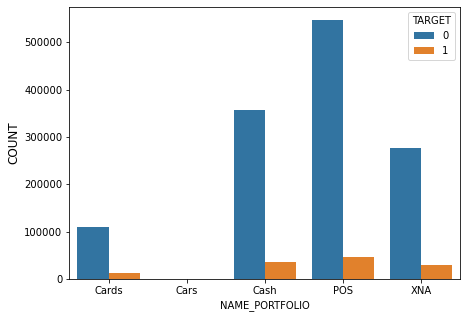

In [28]:
plt.figure(figsize=(7,5))
a = df3.groupby(['NAME_PORTFOLIO','TARGET']).count()[['SK_ID_CURR']].reset_index()
sns.barplot(x='NAME_PORTFOLIO',y='SK_ID_CURR',hue='TARGET',data=a)
plt.ylabel('COUNT',size=12)
plt.show()

In [29]:
ind=df3["NAME_PORTFOLIO"].value_counts().index
value=df3["NAME_PORTFOLIO"].value_counts()/len(df3["NAME_PORTFOLIO"])*100
[print(element) for element in list(zip(ind,value))]

('POS', 41.90843749845264)
('Cash', 27.70479754912814)
('XNA', 21.731115702683947)
('Cards', 8.62876944983416)
('Cars', 0.02687979990111063)


[None, None, None, None, None]

In [30]:
print("NAME_PRODUCT_TYPE")
df3["NAME_PRODUCT_TYPE"].value_counts()

NAME_PRODUCT_TYPE


XNA        900053
x-sell     385394
walk-in    128254
Name: NAME_PRODUCT_TYPE, dtype: int64

In [31]:
print("The channeltype on which the client was previously acquired:")
df3['CHANNEL_TYPE'].value_counts()
ind=df3["CHANNEL_TYPE"].value_counts().index
value=df3["CHANNEL_TYPE"].value_counts()/len(df3["CHANNEL_TYPE"])*100
[print(element) for element in list(zip(ind,value))]

The channeltype on which the client was previously acquired:
('Credit and cash offices', 42.4659811374541)
('Country-wide', 29.9258471204307)
('Stone', 12.980679790139499)
('Regional / Local', 6.541128569619743)
('Contact center', 4.165732357832384)
('AP+ (Cash loan)', 3.5102189218229314)
('Channel of corporate sales', 0.38169315859577096)
('Car dealer', 0.028718944104870834)


[None, None, None, None, None, None, None, None]

In [32]:
print("Selling area of seller place of the previous application")
df3['SELLERPLACE_AREA'].value_counts()

Selling area of seller place of the previous application


-1       636583
 0        50680
 50       31699
 30       29690
 20       29085
          ...  
 7518         1
 688          1
 1317         1
 9740         1
 1023         1
Name: SELLERPLACE_AREA, Length: 2077, dtype: int64

The industry of the seller:
Client's education background


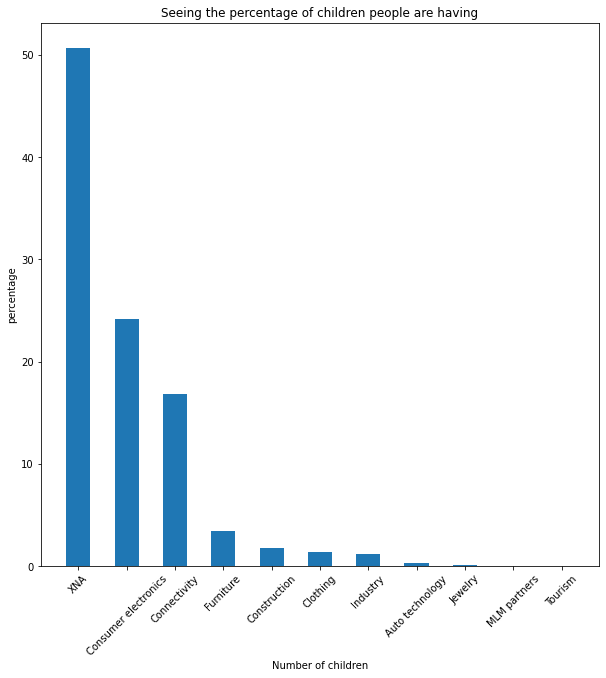

In [33]:
print("The industry of the seller:")
df3['NAME_SELLER_INDUSTRY'].value_counts()
print("Client's education background")
plt.figure(figsize=(10,10))
c=(df3["NAME_SELLER_INDUSTRY"].value_counts().values/len(df3["NAME_SELLER_INDUSTRY"]))*100
l=list(df3["NAME_SELLER_INDUSTRY"].value_counts().index)
l=list(map(str,l))
plt.bar(l,c,width=0.5)
plt.title("Seeing the percentage of children people are having")
plt.ylabel("percentage")
plt.xlabel("Number of children")
plt.xticks(rotation=45)
plt.show()

Term of previous credit at application of the previous application
12.0    275258
6.0     162760
10.0    122546
0.0     121985
24.0    116777
18.0     65532
36.0     60844
60.0     45697
48.0     40709
8.0      26117
4.0      23360
30.0     14599
14.0      7188
42.0      6229
16.0      4782
5.0       3490
54.0      1853
20.0      1613
7.0       1282
9.0       1118
3.0        944
15.0       837
11.0       582
72.0       123
13.0        48
84.0        45
17.0        37
22.0        32
23.0        24
26.0        11
66.0        10
35.0         9
28.0         8
29.0         6
19.0         5
32.0         5
34.0         3
59.0         3
21.0         3
41.0         3
39.0         2
45.0         2
47.0         2
44.0         1
53.0         1
40.0         1
38.0         1
33.0         1
Name: CNT_PAYMENT, dtype: int64






(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

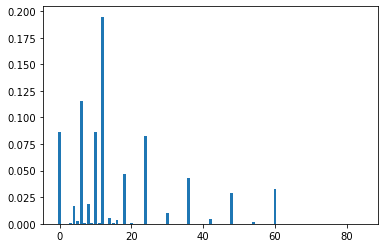

In [34]:
print("Term of previous credit at application of the previous application")
df3['CNT_PAYMENT'].value_counts()
print(df3["CNT_PAYMENT"].value_counts())
print("\n\n\n")
plt.bar(df3["CNT_PAYMENT"].value_counts().index,df3["CNT_PAYMENT"].value_counts().values/len(df3["CNT_PAYMENT"]),width=0.8)
plt.xticks()

In [35]:
print("Grouped interest rate into small medium and high of the previous application")
df3['NAME_YIELD_GROUP'].value_counts()
ind=df3["NAME_YIELD_GROUP"].value_counts().index
value=df3["NAME_YIELD_GROUP"].value_counts()/len(df3["NAME_YIELD_GROUP"])*100
[print(element) for element in list(zip(ind,value))]


Grouped interest rate into small medium and high of the previous application
('XNA', 30.359885152518107)
('middle', 22.987251193852167)
('high', 21.649627467194264)
('low_normal', 19.444281357939197)
('low_action', 5.558954828496266)


[None, None, None, None, None]

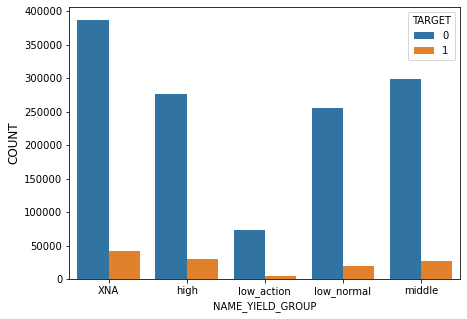

In [36]:
plt.figure(figsize=(7,5))
a = df3.groupby(['NAME_YIELD_GROUP','TARGET']).count()[['SK_ID_CURR']].reset_index()
sns.barplot(x='NAME_YIELD_GROUP',y='SK_ID_CURR',hue='TARGET',data=a)
plt.ylabel('COUNT',size=12)
plt.show()

In [37]:
print("Detailed product combination of the previous application")
df3['PRODUCT_COMBINATION'].value_counts()
nd=df3["PRODUCT_COMBINATION"].value_counts().index
value=df3["PRODUCT_COMBINATION"].value_counts()/len(df3["PRODUCT_COMBINATION"])*100
[print(element) for element in list(zip(ind,value))]

Detailed product combination of the previous application
('XNA', 16.630178517239504)
('middle', 16.019228960013468)
('high', 13.500025818755168)
('low_normal', 8.490904370867673)
('low_action', 7.82336576121825)


[None, None, None, None, None]

In [38]:
print("Relative to application date of current application when was the first disbursement of the previous application")
df3['DAYS_FIRST_DRAWING'].value_counts()


Relative to application date of current application when was the first disbursement of the previous application


 365243.0    799094
-228.0          115
-224.0          113
-212.0          112
-220.0          111
              ...  
-1842.0           1
-1844.0           1
-1845.0           1
-1846.0           1
-1886.0           1
Name: DAYS_FIRST_DRAWING, Length: 2799, dtype: int64

In [39]:
print("Relative to application date of current application when was the first due supposed to be of the previous application:")
df3['DAYS_FIRST_DUE'].value_counts()


Relative to application date of current application when was the first due supposed to be of the previous application:


 365243.0    33962
-334.0         661
-299.0         653
-208.0         650
-292.0         647
             ...  
-2887.0         66
-2890.0         58
-2891.0         44
-2.0            11
-2892.0          5
Name: DAYS_FIRST_DUE, Length: 2892, dtype: int64

In [40]:
print("Relative to application date of current application when was the first due of the previous application:")
df3['DAYS_LAST_DUE_1ST_VERSION'].value_counts()


Relative to application date of current application when was the first due of the previous application:


365243.0    79099
9.0           621
10.0          601
0.0           600
8.0           595
            ...  
2016.0          1
2389.0          1
1746.0          1
1990.0          1
2032.0          1
Name: DAYS_LAST_DUE_1ST_VERSION, Length: 4604, dtype: int64

In [41]:
print("Relative to application date of current application when was the last due date of the previous application:")
df3['DAYS_LAST_DUE'].value_counts()


Relative to application date of current application when was the last due date of the previous application:


 365243.0    180792
-239.0          569
-188.0          564
-245.0          559
-236.0          550
              ...  
-2837.0           1
-2836.0           1
-2833.0           1
-2824.0           1
-2889.0           1
Name: DAYS_LAST_DUE, Length: 2869, dtype: int64

In [42]:
print("Relative to application date of current application the expected termination of the previous application:")
df3['DAYS_TERMINATION'].value_counts()


Relative to application date of current application the expected termination of the previous application:


 365243.0    194000
-156.0          653
-233.0          652
-170.0          641
-163.0          638
              ...  
-2804.0           1
-2757.0           1
-2803.0           1
-2802.0           1
-2852.0           1
Name: DAYS_TERMINATION, Length: 2809, dtype: int64

In [43]:
print("Clients requested for insurance during the previous application:")
df3['NFLAG_INSURED_ON_APPROVAL'].value_counts()
ind=df3["NFLAG_INSURED_ON_APPROVAL"].value_counts().index
value=df3["NFLAG_INSURED_ON_APPROVAL"].value_counts()/len(df3["NFLAG_INSURED_ON_APPROVAL"])*100
[print(element) for element in list(zip(ind,value))]

Clients requested for insurance during the previous application:
(0.0, 40.37282282462841)
(1.0, 19.936606114022695)


[None, None]

***Only 20 percent of the clients requested for insurance***

In [44]:
df3['DAYS_TERMINATION'].value_counts()

 365243.0    194000
-156.0          653
-233.0          652
-170.0          641
-163.0          638
              ...  
-2804.0           1
-2757.0           1
-2803.0           1
-2802.0           1
-2852.0           1
Name: DAYS_TERMINATION, Length: 2809, dtype: int64

<AxesSubplot:>

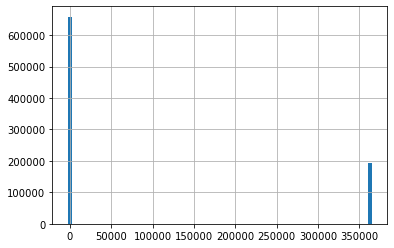

In [45]:
df3['DAYS_TERMINATION'].hist(bins=70)